<a href="https://colab.research.google.com/github/harnalashok/Clustering/blob/master/Why_normalize_in_kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Last amended: 14th May, 2002
# My folder:
# Ref: https://stats.stackexchange.com/a/283941/78454
# Objectives:
#             What happens if data is not normalized before using KMeans
#             (Incorrect clusters are created)

In [6]:
# 1.0 Call libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [22]:
# 1.1
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [7]:
# 2.0 Create random data
#      Syntax: random.randn(d0, d1, ..., dn)
#      Return a sample (or samples) from the “standard normal” distribution.

rnorm = np.random.randn

In [47]:
# 2.1
x = rnorm(1000) * 10            # Values along x-axis are 10 times higher
                                #  than that on y-axis
                                # Multiplication by 10 implies data is no longer normalized
#x

In [48]:
# 2.2
y = np.concatenate(
                    [
                      rnorm(500),       # Ist cluster of 500 pts
                      rnorm(500) + 5    # IInd clsuter of 500 pts,
                                        #  center is 5 units above the earlier
                    ],
                   axis = 0             # Being one dimensional only one axis is available
                   )

y.shape

(1000,)

In [ ]:
# 3.0 Small experiment on axis:
a = np.array([[1],[2]])
b = np.array([[3],[4]])
np.concatenate([a,b], axis =0)
np.concatenate([a,b], axis = 1)

In [56]:
# 3.1 
a = np.array([1,2,3])
b = np.array([4,5,6])
np.array([a,b])    # Same as np.array([[1,2], [3,4]]) 
print("\n--Effect of transpose--\n")
np.array([a,b]).T

array([[1, 2, 3],
       [4, 5, 6]])


--Effect of transpose--



array([[1, 4],
       [2, 5],
       [3, 6]])

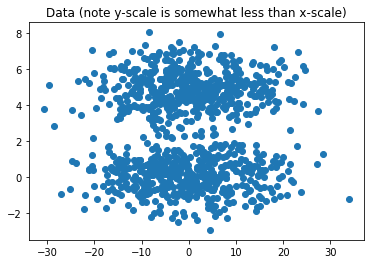

In [55]:
# 4.0 Observe the data:
fig, axes = plt.subplots(1, 1)
axes.scatter(x, y)  # Plot clusters
axes.set_title('Data (note y-scale is somewhat less than x-scale)')
plt.show() ;

In [ ]:
# 4.1 Kmeans now
km = KMeans(2)  # We create 2 clusters
clusters = km.fit_predict(np.array([x, y]).T)   # Un-normalized data
clusters

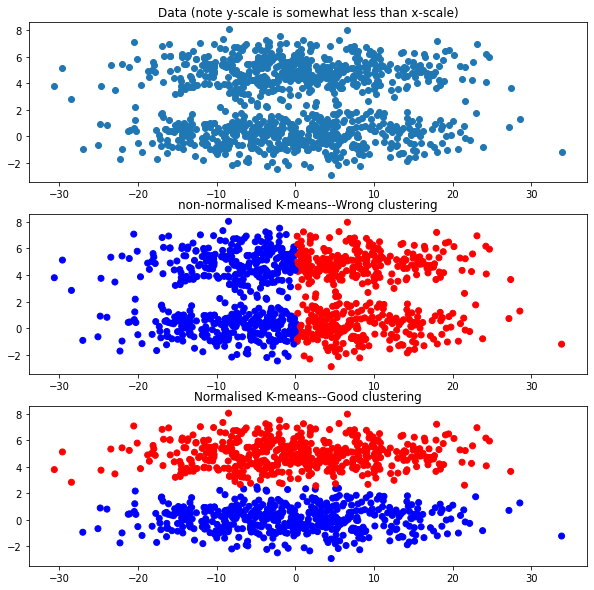

In [58]:
# 5.0 Use Kmeans as also plot clusters
# 5.1
fig, axes = plt.subplots(3, 1, figsize = (10,10))
axes[0].scatter(x, y)  # Plot clusters
axes[0].set_title('Data (note y-scale is somewhat less than x-scale)')
# 5.2
km = KMeans(2)  # We create 2 clusters
clusters = km.fit_predict(np.array([x, y]).T)   # Un-normalized data
axes[1].scatter(x, y, c=clusters, cmap='bwr')   # 'bwr' ==> bluse, white, red
axes[1].set_title('non-normalised K-means--Wrong clustering')
# 5.3
clusters = km.fit_predict(np.array([x / 10, y]).T) # Normalized data
axes[2].scatter(x, y, c=clusters, cmap='bwr')
axes[2].set_title('Normalised K-means--Good clustering')
# 5.4 Now show all plots
plt.show();
############################

In [ ]:
############## I am done ################